In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit
%matplotlib inline

# Description of the digits dataset:

- Read the original [documentation](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)
- Data are the "pixels"
- We want to predict what number someone wrote
- Application: when you take a picture of your check to have it deposited

In [2]:
# load the dataset
digits = datasets.load_digits()

In [3]:
# assign X and y for our model
X, y = digits.data, digits.target

(-0.5, 7.5, 7.5, -0.5)

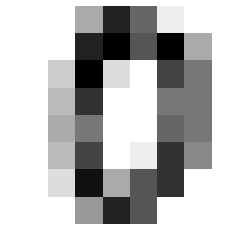

In [4]:
# what the data look like
# this is a 0
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')

# Setup the experiment

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

# Parameters to tune for SVM

- C (float): penalty parameter, adjust much like we adjust alpha in regularized regression
- Kernel (string): kernel type to use; choose from ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
- Gamma (float): kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’; will need to adjust based on data
- Probability (boolean): set to True if we want to be able to predict probabilities; this will have a MAJOR speed cost

[documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [6]:
from sklearn.svm import SVC

In [7]:
clf = SVC(gamma=0.01)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
clf.score(X_test, y_test)

0.6833333333333333

In [9]:
# use classification report to find performance on each digit
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.67      1.00      0.81        29
           1       0.69      1.00      0.82        29
           2       0.70      1.00      0.82        28
           3       0.85      1.00      0.92        29
           4       0.76      1.00      0.86        28
           5       1.00      0.20      0.33       142
           6       0.79      1.00      0.88        22
           7       0.55      1.00      0.71        18
           8       0.33      1.00      0.49        14
           9       0.66      1.00      0.79        21

    accuracy                           0.68       360
   macro avg       0.70      0.92      0.74       360
weighted avg       0.81      0.68      0.62       360



# Any ideas why we do so well on 6 and 3?

(-0.5, 7.5, 7.5, -0.5)

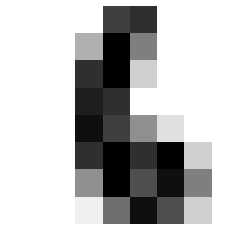

In [10]:
plt.imshow(digits.images[6], cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

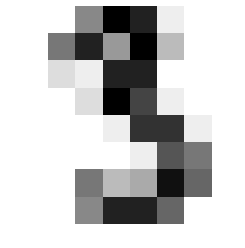

In [11]:
plt.imshow(digits.images[3], cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')

# Your turn

In [18]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [ ]:
# tune the model using gridsearch to maximize accuracy

In [2]:
import numpy as np

In [3]:
np.linspace(.001, 10, 10)

array([1.000e-03, 1.112e+00, 2.223e+00, 3.334e+00, 4.445e+00, 5.556e+00,
       6.667e+00, 7.778e+00, 8.889e+00, 1.000e+01])

In [5]:
np.linspace(1, 100, 10)

array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])

In [19]:
# we don't need to standardize since we're already on the same scale!
params = {'C': np.linspace(.001, 10, 10), 'kernel': ['poly', 'rbf'],
         'degree': range(1,4), 'gamma': np.linspace(.001, 10, 10)}
clf = SVC()
grid = GridSearchCV(clf, params, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='...
             param_grid={'C': array([1.000e-03, 1.112e+00, 2.223e+00, 3.334e+00, 4.445e+00, 5.556e+00,
       6.667e+00, 7.778e+00, 8.889e+00, 1.000e+01]),
                         'degree': range(1, 4),
                         'gamma': array([1.000e-03, 1.112e+00, 2.223e+00, 3.334e+00, 4.445e+00, 5.556e+00,
       6.667e+00, 7.778e+00, 8.889e+00, 1.000e+01]),
                         'kernel': ['poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [20]:
grid.best_params_

{'C': 0.001, 'degree': 3, 'gamma': 1.1119999999999999, 'kernel': 'poly'}

In [21]:
best_svm = grid.best_estimator_

In [17]:
# which kernel performs best? why do you think it performs best?

Poly is able to mimic the shape of the pixels using cubic. Rbf would probably also work well as it will mimic the circular shapes within the pixel representations.

In [18]:
# how good is your accuracy on the test set? how long does the SVM take to fit?

In [22]:
best_svm.score(X_test, y_test)

0.9722222222222222

In [20]:
clf2 = SVC(C=0.001, degree=3, gamma=1.111999, kernel='poly')
%timeit clf2.fit(X_train, y_train)

10 loops, best of 3: 42.5 ms per loop


In [21]:
# use classification report to see which digits your SVM is best/worst at predicting
# try creating visualizations

In [22]:
print(classification_report(best_svm.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        44
          1       1.00      0.95      0.98        44
          2       1.00      1.00      1.00        40
          3       1.00      0.97      0.99        35
          4       1.00      1.00      1.00        37
          5       1.00      0.90      0.95        31
          6       0.96      1.00      0.98        27
          7       0.97      0.97      0.97        33
          8       0.91      0.97      0.94        40
          9       0.88      0.97      0.92        29

avg / total       0.97      0.97      0.97       360



In [23]:
# do you think SVM is well-suited to predict handwritten digits?

Yes, SVM can learn complex non-linear decision boundaries that occur with handwritten digits.